In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [51]:
import numpy as np
import pandas as pd

file_path ='/content/drive/My Drive/Colab/Dataset/input_data.xlsx'

ATA_Data = pd.read_excel(file_path)
ATA_Data.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [52]:
ATA_Data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


In [53]:
ATA_Data.shape

(8500, 4)

In [54]:
ATA_Data.drop(columns='Caller',inplace=True)

In [55]:
ATA_Data.drop_duplicates(inplace=True)
ATA_Data.shape

(7909, 3)

In [56]:
ATA_Data['Short description'].fillna(value=' ', inplace=True)
ATA_Data['Description'].fillna(value=' ', inplace=True)

In [57]:
ATA_Data['Assignment group'].unique()

array(['GRP_0', 'GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7',
       'GRP_8', 'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31',
       'GRP_33', 'GRP_34', 'GRP_35', 'GRP_36', 'GRP_37', 'GRP_38',
       'GRP_39', 'GRP_40', 'GRP_41', 'GRP_42', 'GRP_43', 'GRP_44',
       'GRP_45', 'GRP_46', 'GRP_47', 'GRP_48', 'GRP_49', 'GRP_50',
       'GRP_51', 'GRP_52', 'GRP_53', 'GRP_54', 'GRP_55', 'GRP_56',
       'GRP_57', 'GRP_58', 'GRP_59', 'GRP_60', 'GRP_61', 'GRP_32',
       'GRP_62', 'GRP_63', 'GRP_64', 'GRP_65', 'GRP_66', 'GRP_67',
       'GRP_68', 'GRP_69', 'GRP_70', 'GRP_71', 'GRP_72', 'GRP_73'],
      dtype=object)

In [58]:
from sklearn.preprocessing import LabelEncoder
# creating initial dataframe
asgn_grps = ATA_Data['Assignment group'].unique()
asgn_grps_df = pd.DataFrame(ATA_Data, columns=['Assignment group'])
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
ATA_Data['Assignment category'] = labelencoder.fit_transform(asgn_grps_df['Assignment group'])

In [59]:
ATA_Data.head(10)

,Short description,Description,Assignment group,Assignment category
0,login issue,-verified user details.(employee# & manager na...,GRP_0,0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,GRP_0,0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,GRP_0,0
3,unable to access hr_tool page,unable to access hr_tool page,GRP_0,0
4,skype error,skype error,GRP_0,0
5,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype,GRP_0,0
6,event: critical:HostName_221.company.com the v...,event: critical:HostName_221.company.com the v...,GRP_1,1
7,ticket_no1550391- employment status - new non-...,ticket_no1550391- employment status - new non-...,GRP_0,0
8,unable to disable add ins on outlook,unable to disable add ins on outlook,GRP_0,0
9,ticket update on inplant_874773,ticket update on inplant_874773,GRP_0,0


In [60]:
ATA_Assignment = ATA_Data['Assignment group'].value_counts()

In [61]:
ATA_Assignment.describe()

count      74.000000
mean      106.878378
std       403.555396
min         1.000000
25%         5.250000
50%        26.000000
75%        81.000000
max      3429.000000
Name: Assignment group, dtype: float64

In [62]:
temp_df = pd.DataFrame(ATA_Data['Assignment group'].value_counts())

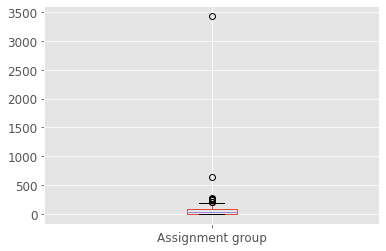

In [98]:
temp_df.boxplot(column='Assignment group',grid=True,fontsize="large")

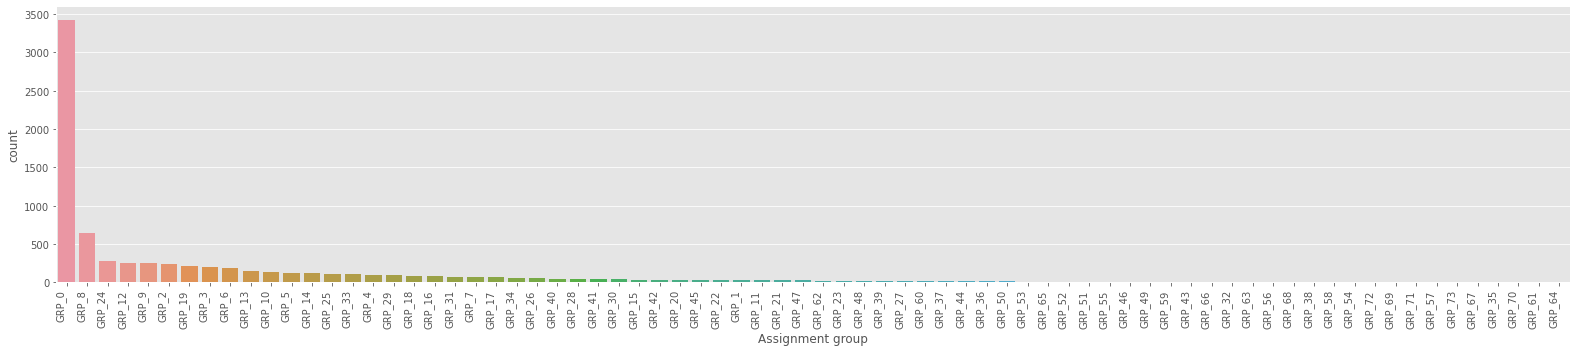

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import pandas.util.testing as tm
plt.style.use('ggplot')
%matplotlib inline

descending_order = ATA_Data['Assignment group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
ax=sns.countplot(x='Assignment group', data=ATA_Data,order=descending_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

In [67]:
ATA_Data['Assignment category'].skew()  # Indicates a very high +ve skewness. // TODO normalize distribution

1.2670583477078783

In [68]:
temp_df2 = pd.DataFrame(ATA_Data['Assignment group'].value_counts())
temp_df2 = temp_df2.T
temp_df2

,GRP_0,GRP_8,GRP_24,GRP_12,GRP_9,GRP_2,GRP_19,GRP_3,GRP_6,GRP_13,GRP_10,GRP_5,GRP_14,GRP_25,GRP_33,GRP_4,GRP_29,GRP_18,GRP_16,GRP_31,GRP_7,GRP_17,GRP_34,GRP_26,GRP_40,GRP_28,GRP_41,GRP_30,GRP_15,GRP_42,GRP_20,GRP_45,GRP_1,GRP_22,GRP_11,GRP_21,GRP_47,GRP_62,GRP_23,GRP_48,GRP_39,GRP_27,GRP_60,GRP_37,GRP_36,GRP_44,GRP_50,GRP_53,GRP_65,GRP_52,GRP_51,GRP_55,GRP_59,GRP_46,GRP_49,GRP_43,GRP_66,GRP_32,GRP_63,GRP_56,GRP_68,GRP_38,GRP_58,GRP_54,GRP_72,GRP_69,GRP_71,GRP_57,GRP_61,GRP_70,GRP_73,GRP_67,GRP_35,GRP_64
Assignment group,3429,645,285,256,252,241,214,200,183,145,140,128,118,116,107,99,97,88,85,69,68,68,62,56,45,44,40,39,38,37,36,35,31,31,30,28,27,25,25,25,19,18,16,16,15,15,14,11,11,9,8,8,6,6,6,5,4,4,3,3,3,3,3,2,2,2,2,2,1,1,1,1,1,1


In [69]:
ATA_Data['Count'] = ATA_Data.apply(lambda row: temp_df2[row['Assignment group']] , axis=1)

ATA_Data.loc[ATA_Data['Count'] <= 200 , "Assignment group"] = "GRP_X"

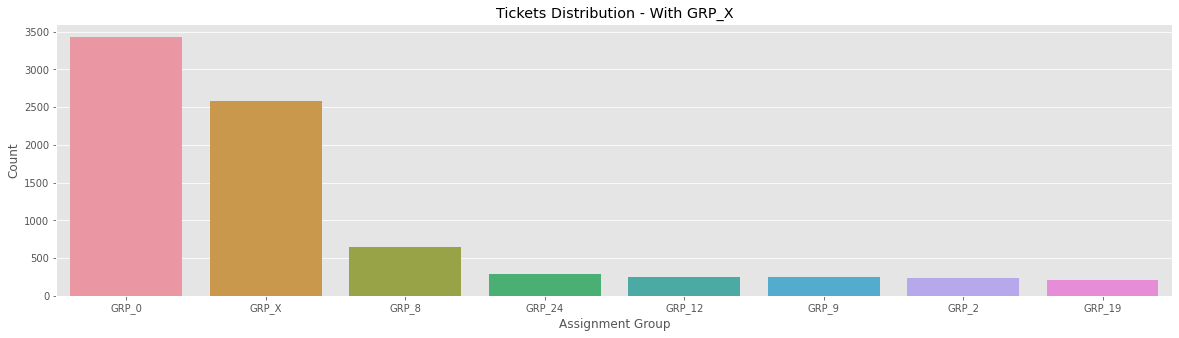

In [70]:
#Plot line graph and view counts of each tickets - After GRP_X

plt.subplots(figsize = (20,5))

sns.countplot(x='Assignment group', data=ATA_Data,order = ATA_Data['Assignment group'].value_counts().index)
plt.xlabel('Assignment Group') 
plt.ylabel('Count') 
plt.title('Tickets Distribution - With GRP_X')

plt.show()

In [76]:
ATA_Data['Assignment category'] = labelencoder.fit_transform(asgn_grps_df['Assignment group'])

In [77]:
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet,stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

from wordcloud import WordCloud, STOPWORDS
import matplotlib.cm as cm
import re
import unicodedata

#Remove numbers
def removeNumbers(text):
    """ Removes integers """
    text = ''.join([i for i in text if not i.isdigit()])         
    return text

#Replace Contractions
contraction_patterns = [ (r'won\'t', 'will not'),(r'didn\'t', 'did not'),(r'didnt', 'did not'), (r'can\'t', 'cannot'),(r'cant', 'cannot'), (r'i\'m', 'i am'), (r'ain\'t', 'is not'), (r'(\w+)\'ll', '\g<1> will'), (r'(\w+)n\'t', '\g<1> not'),
                         (r'(\w+)\'ve', '\g<1> have'), (r'(\w+)\'s', '\g<1> is'), (r'(\w+)\'re', '\g<1> are'), (r'(\w+)\'d', '\g<1> would'), (r'&', 'and'), (r'dammit', 'damn it'), (r'dont', 'do not'), (r'wont', 'will not') ]
def replaceContraction(text):
    patterns = [(re.compile(regex), repl) for (regex, repl) in contraction_patterns]
    for (pattern, repl) in patterns:
        (text, count) = re.subn(pattern, repl, text)
    return text


#Replace Negations with Antonym
def replace(word, pos=None):
    """ Creates a set of all antonyms for the word and if there is only one antonym, it returns it """
    antonyms = set()
    for syn in wordnet.synsets(word, pos=pos):
        for lemma in syn.lemmas():
            for antonym in lemma.antonyms():
                antonyms.add(antonym.name())
    if len(antonyms) == 1:
        return antonyms.pop()
    else:
        return None

def replaceNegations(text):
    """ Finds "not" and antonym for the next word and if found, replaces not and the next word with the antonym """
    i, l = 0, len(text)
    words = []
    while i < l:
        word = text[i]
        if word == 'not' and i+1 < l:
            ant = replace(text[i+1])
            if ant:
                words.append(ant)
                i += 2
                continue
        words.append(word)
        i += 1
    return words

def antonym(text):
    tokens = nltk.word_tokenize(text)
    tokens = replaceNegations(tokens)
    text = " ".join(tokens)
    return text


#Remove Stopwords
stoplist = stopwords.words('english')
stoplist.remove('no')
stoplist.remove('not')
def stp_words(text):
    finalTokens = []
    tokens = nltk.word_tokenize(text)
    for w in tokens:
        if (w not in stoplist):
            finalTokens.append(w)
    text = " ".join(finalTokens)
    return text

#Remove mail related words
mail_words_list = ['hi','hello','com','gmail','cc','regards','thanks']
def mail_words(text):
    finalTokens = []
    tokens = nltk.word_tokenize(text)
    for w in tokens:
        if (w not in mail_words_list):
            finalTokens.append(w)
    text = " ".join(finalTokens)
    return text

#Lemmatization
stemmer = PorterStemmer() #set stemmer
lemmatizer = WordNetLemmatizer() # set lemmatizer

def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

def lemmatize_sentence(sentence):
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

#Remove accented characters
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [78]:
def clean_data(text):
    # remove numbers
    text = removeNumbers(text)
    
    #remove punctuations
    text = re.sub(r"\W", " ", text, flags=re.I)
    text = text.replace('_',' ')
    
    #replace contractions
    text = replaceContraction(text)
    
    #remove accents
    text = remove_accented_chars(text)
    
    #convert to lower case
    text = text.lower()
    
    #remove stopwords
    text = stp_words(text)
    
    #remove mail related words
    text = mail_words(text)
        
    #lemmatization
    text = lemmatize_sentence(text)
    
    return text

In [79]:
ATA_Data['Short description'] = ATA_Data['Short description'].apply(clean_data)
ATA_Data['Description'] = ATA_Data['Description'].apply(clean_data)

In [80]:
ATA_Data['Full Description'] = ATA_Data['Short description'] + ' '+ ATA_Data['Description']
#ATA_Data.drop(columns=['Short description','Description'],inplace=True)

In [81]:
ATA_Data.head(5)

,Short description,Description,Assignment group,Assignment category,Count,Full Description
0,login issue,verify user detail employee manager name check...,GRP_0,0,3429,login issue verify user detail employee manage...
1,outlook,receive hmjdrvpb komuaywn team meeting skype m...,GRP_0,0,3429,outlook receive hmjdrvpb komuaywn team meeting...
2,not log vpn,receive eylqgodm ybqkwiam not log vpn best,GRP_0,0,3429,not log vpn receive eylqgodm ybqkwiam not log ...
3,unable access hr tool page,unable access hr tool page,GRP_0,0,3429,unable access hr tool page unable access hr to...
4,skype error,skype error,GRP_0,0,3429,skype error skype error


In [82]:
ATA_Data['Full Description'][186]

'e oc shipment notificatione c e 34c12 send friday october nwfodmhc exurcwkm subject e oc shipment notificatione c e 34c12 deari14 pls help update customer shipment notification email address abcdegy b'

In [83]:
def generate_tokens(text):
  return nltk.word_tokenize(text)

In [84]:
ATA_Data['Tokens'] = ATA_Data['Full Description'].apply(generate_tokens)

In [85]:
ATA_Data.head()

,Short description,Description,Assignment group,Assignment category,Count,Full Description,Tokens
0,login issue,verify user detail employee manager name check...,GRP_0,0,3429,login issue verify user detail employee manage...,"[login, issue, verify, user, detail, employee,..."
1,outlook,receive hmjdrvpb komuaywn team meeting skype m...,GRP_0,0,3429,outlook receive hmjdrvpb komuaywn team meeting...,"[outlook, receive, hmjdrvpb, komuaywn, team, m..."
2,not log vpn,receive eylqgodm ybqkwiam not log vpn best,GRP_0,0,3429,not log vpn receive eylqgodm ybqkwiam not log ...,"[not, log, vpn, receive, eylqgodm, ybqkwiam, n..."
3,unable access hr tool page,unable access hr tool page,GRP_0,0,3429,unable access hr tool page unable access hr to...,"[unable, access, hr, tool, page, unable, acces..."
4,skype error,skype error,GRP_0,0,3429,skype error skype error,"[skype, error, skype, error]"


In [86]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)

#function to create Word Cloud
def show_wordcloud(data, title):
    wordcloud = WordCloud(
        stopwords=stopwords,
        max_words=150,
        max_font_size=40, 
        scale=3,
        random_state=1 
    ).generate(str(data))

    fig = plt.figure(1, figsize=(15, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

In [87]:
def display_word_cloud():
  for grp in ATA_Data['Assignment group'].unique().tolist():
    text_Str = ATA_Data['Description'][ATA_Data['Assignment group'].isin([grp])].tolist()
    show_wordcloud(text_Str, "\n"+ grp.upper())

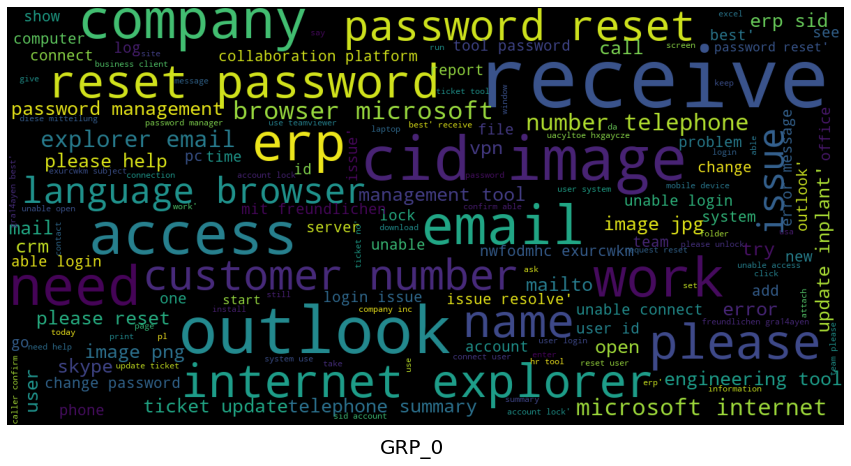

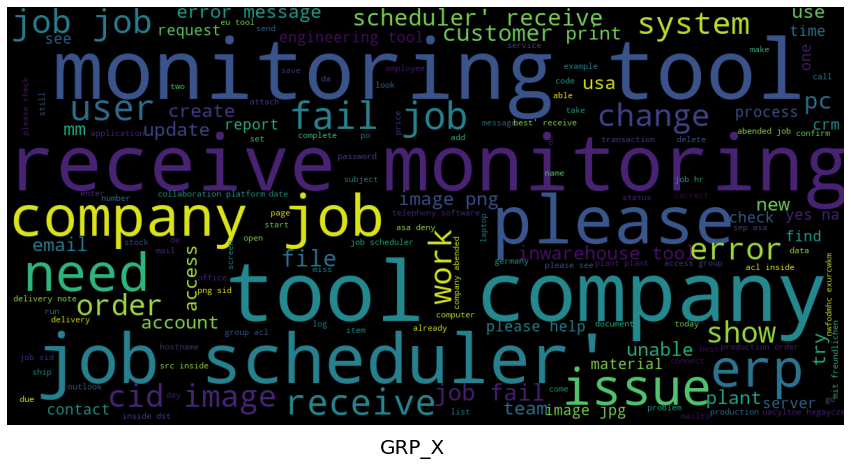

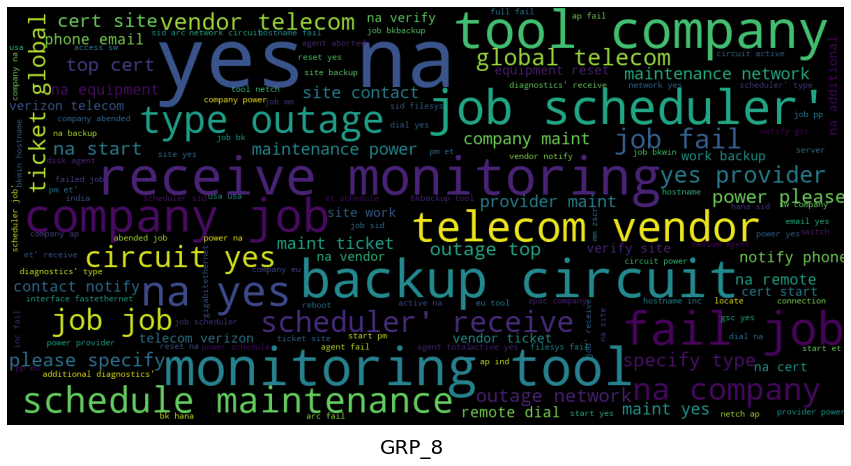

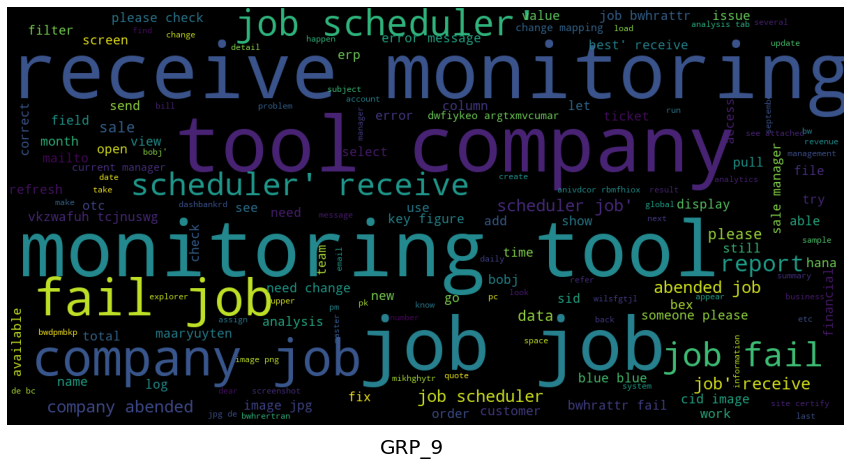

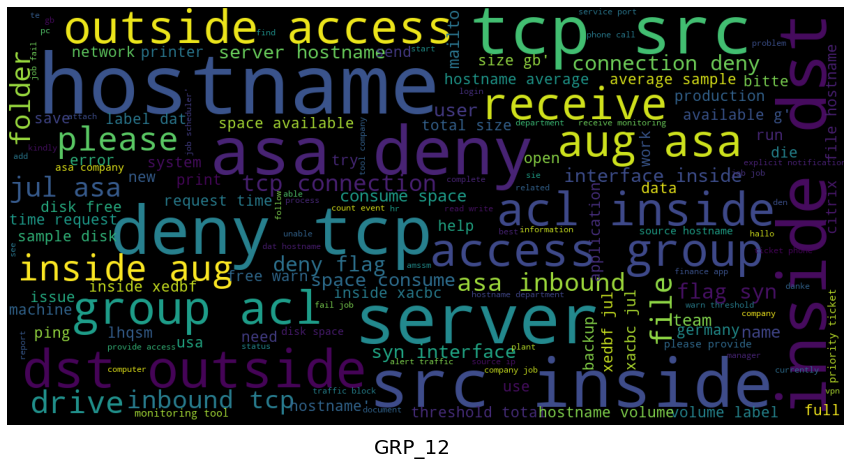

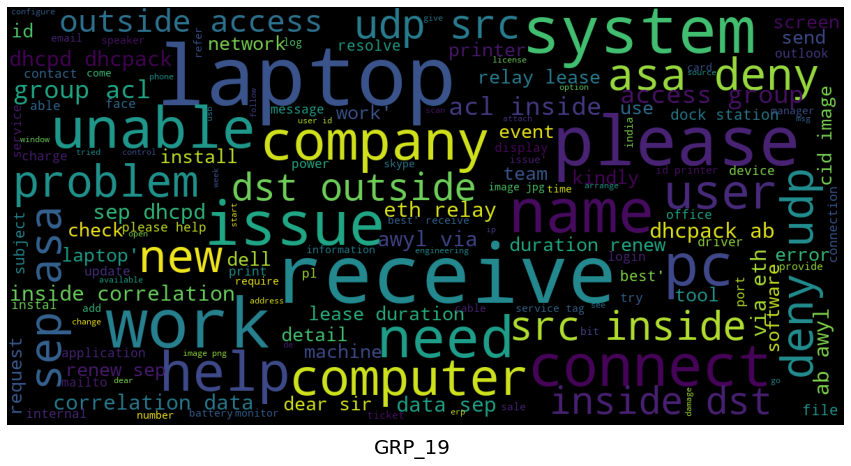

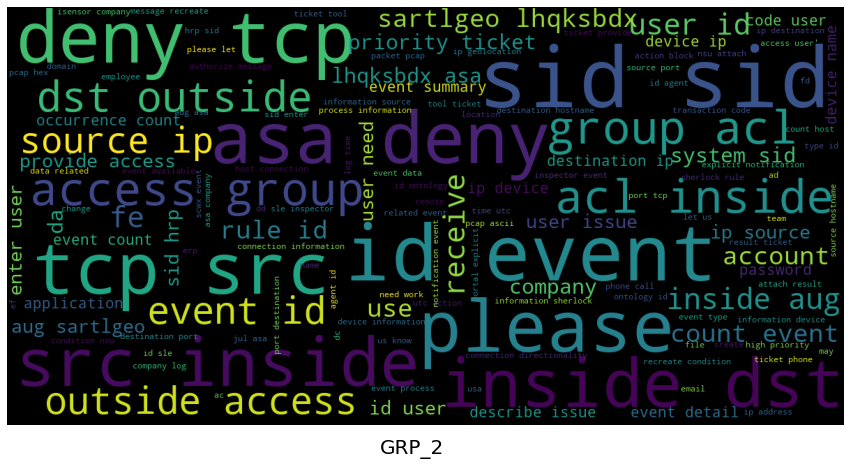

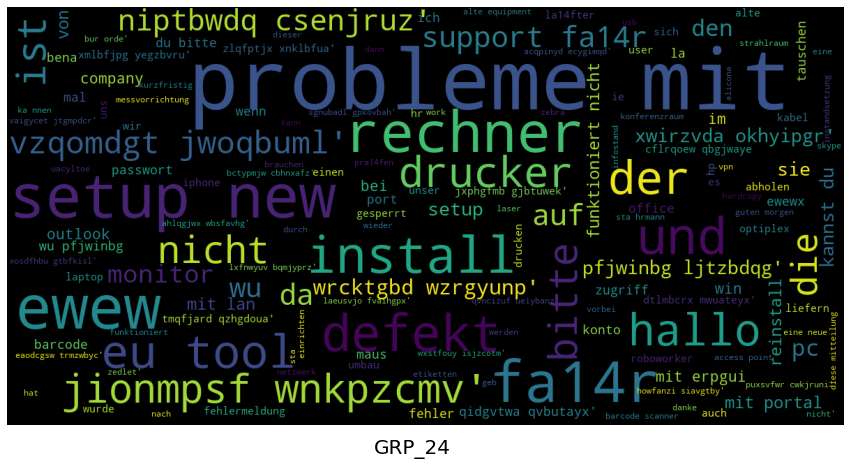

In [88]:
display_word_cloud()